# Sumário
<a id='sumario'></a>
- [sumario](#sumario)
- [Carregando dados](#carregando-dados)
- [Análise de dados](#analise-de-dados)
  - [Investigando as proporcoes dos vários tipos de estabelecimentos](#i1)
    - [Gráfico](#g1)
  - [Investigando as proporcoes de estabelecimentos de rede](#iv)
    - [Gráfico](#grafico2)
  - [Qual tipo de estabelecimento é típico para redes?](#iv-rede)
  - [O que caracteriza redes: muitos estabelecimentos com um pequeno número de assentos? poucos estabelecimentos com muitos assentos?](#redes)
    - [Número médio de assentos para cada tipo de restaurante](#assentos)
    - [Em média, qual tipo de restaurante tem o maior número de assentos?](#maior)
      - [Gráficos](#graficos3)
  - [Separando os dados dos nomes das ruas da coluna address em uma coluna separada](#ruas)
    - [Gráfico das dez ruas com o maior número de restaurantes](#top10)
    - [Encontrando o número de ruas que têm apenas um restaurante](#so1)
    - [Análise das ruas com muitos restaurantes, à luz da distribuição do número de assentos](#distribuicao)
    - [Conclusões sobre tendências](#conclusao)     
- [apresentando](#apresentacao)

[sumario](#sumario)
# Carregando dados <a class="" id="carregando-dados"></a>

In [145]:
#importando bibliotecas
import pandas as pd
import numpy as np
import math as mth
import scipy.stats as stats
from scipy import stats as st
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import median
import plotly.express as px
from plotly import graph_objects as go

In [146]:
caminho='rest_data_us.csv'
try:
    restaurantes=pd.read_csv('/datasets/rest_data_us.csv')
except:
    restaurantes=pd.read_csv(caminho)
restaurantes

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


In [147]:
restaurantes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


<font color='green'>encontramos alguns valores ausentes (3) na coluna booliana chain, entende-se que a ausencia significa False.

In [148]:
restaurantes.loc[restaurantes['chain'].isnull(), 'chain'] = False
restaurantes.loc[restaurantes['chain'].isnull()]

,id,object_name,address,chain,object_type,number


In [149]:

#é bom mudar o tipo da coluna para booliano
restaurantes['chain'] = restaurantes['chain'].astype(bool)
#não tem sentido ter linhas duplicadas
restaurantes=restaurantes.drop_duplicates()
#renomear as colunas para portugues torna mais intuitivo
restaurantes.columns = ['id', 'nome', 'endereco', 'rede', 'tipo', 'assento']



[sumario](#sumario)

# Analise de dados <a class="" id="analise-de-dados"></a>

agora que os dados estão limpos, vamos analizá-los.

[sumario](#sumario)
## Investigando as proporções dos vários tipos de estabelecimentos.  
<a  id='i1'> </a>

In [150]:
tipoderestaurante=restaurantes.groupby('tipo').agg({'id':'count'}).reset_index().sort_values(by='id', ascending=False)
tipoderestaurante

,tipo,id
5,Restaurant,7255
3,Fast Food,1066
2,Cafe,435
4,Pizza,320
1,Bar,292
0,Bakery,283



a maioria são restaurantes, depois fast foods

[sumario](#sumario)
### grafico. 
<a id='g1'> </a>

In [151]:
with plt.style.context('seaborn-deep'):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='tipo', y='id', data=tipoderestaurante)
    plt.title('quantidade de estabelecimentos')


In [152]:

fig=go.Figure(data=[go.Pie(labels=tipoderestaurante['tipo'], values=tipoderestaurante['id'])])

fig.show()


In [153]:
colors = sns.color_palette('dark')
fig, conf = plt.subplots()
conf.set_title('tipos de estabelecimentos')
plt.pie(tipoderestaurante['id'], labels=tipoderestaurante['tipo'], colors=colors)

fig.set_figheight(6) # alterando a altura
fig.set_figwidth(8) # alterando a largura

[sumario](#sumario)
## Investigando as proporcoes, se pertencem ou não a redes. 
<a id= 'iv'> </a>

In [154]:
chain=restaurantes.groupby('rede').agg({'id':'count'}).reset_index()
chain

,rede,id
0,False,5975
1,True,3676


In [155]:
prop=chain.loc[0]['id']/chain.loc[1]['id']
print("Tem {:.2f} vezes mais restaurantes não ligados a redes do que ligados a redes".format(prop))

Tem 1.63 vezes mais restaurantes não ligados a redes do que ligados a redes


[sumario](#sumario)
### gráfico. 
<a id='grafico2'> </a>

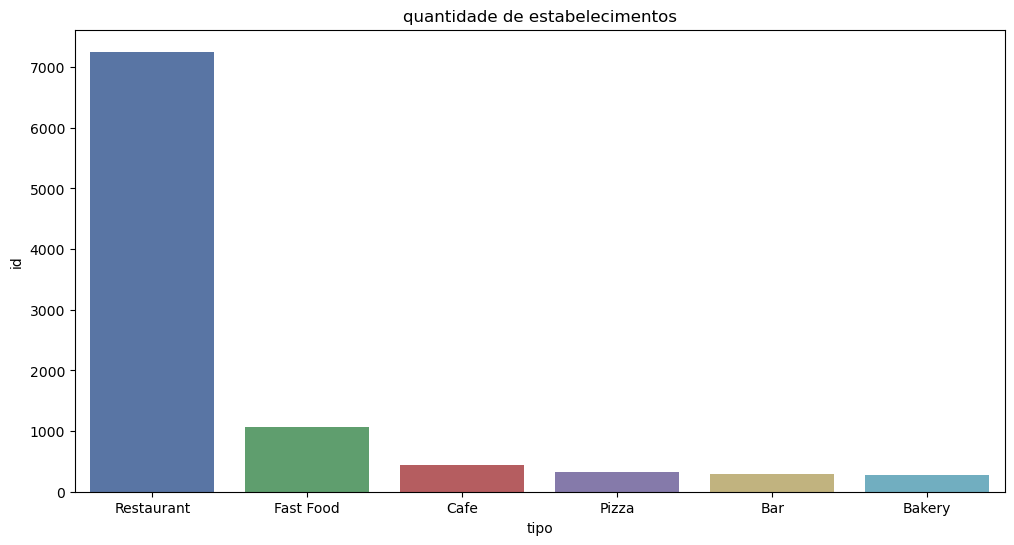

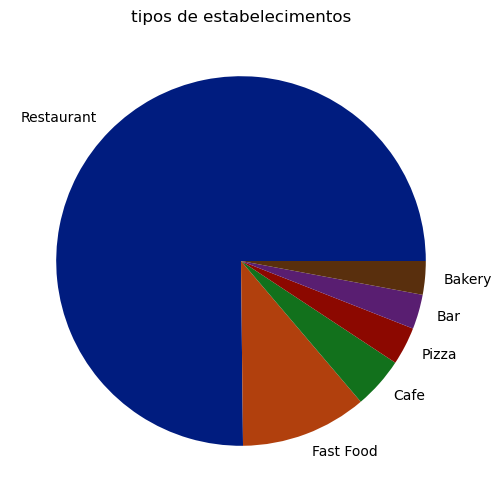

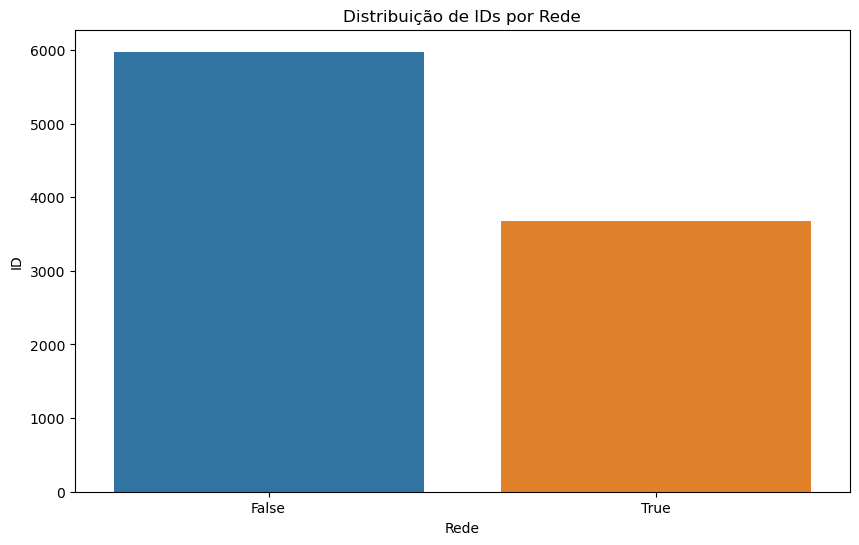

In [156]:


plt.figure(figsize=(10, 6)) 
sns.barplot(x='rede', y='id', data=chain)

# Adiciona título e rótulos aos eixos
plt.title('Distribuição de IDs por Rede')
plt.xlabel('Rede')
plt.ylabel('ID')

# Exibe o gráfico
plt.show()

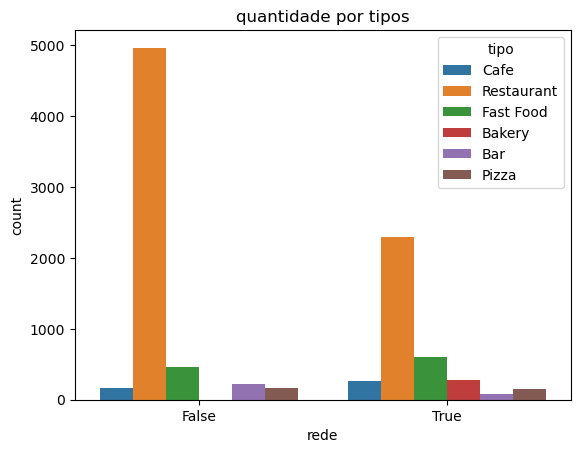

In [157]:
sns.countplot(data=restaurantes, x="rede", hue='tipo')
plt.title("quantidade por tipos")
plt.show()

[sumario](#sumario)
## Qual tipo de estabelecimento é típico para redes? 
<a id='iv-rede'> </a>

 vamos ver, para cada tipo, a porcentagem de estabelecimentos que pertem a redes :

In [158]:
tipomedia=restaurantes.groupby('tipo')[[ 'rede', 'assento']].mean().reset_index()
tipomedia

,tipo,rede,assento
0,Bakery,1.000000,21.773852
1,Bar,0.263699,44.767123
2,Cafe,0.611494,25.000000
3,Fast Food,0.567542,31.837711
4,Pizza,0.478125,28.459375
5,Restaurant,0.315920,48.042316


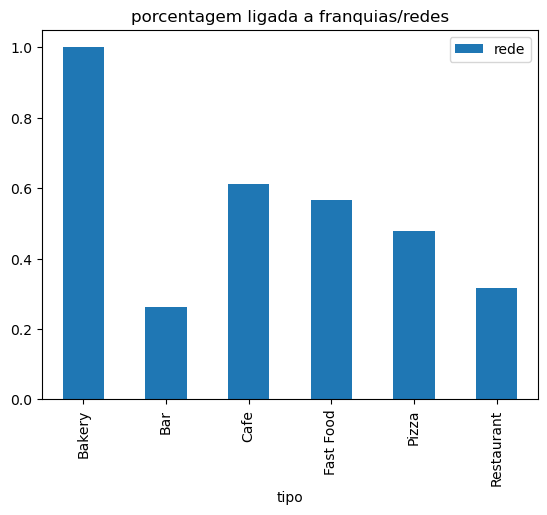

In [159]:
tipomedia.plot.bar(x='tipo', y='rede', title='porcentagem ligada a franquias/redes')
plt.show()

Barkery e cafés são mais tipicos de redes. Bares e restaurantes não.

In [160]:
naorede=restaurantes[restaurantes['rede']==False]
rede=restaurantes[restaurantes['rede']==True]
naoredetipoobj=naorede.groupby('tipo').agg({'id':'count'}).reset_index()
redetipoobj=rede.groupby('tipo').agg({'id':'count'}).reset_index()


In [161]:
fig1 = go.Figure(data=go.Pie(values=naoredetipoobj['id'], labels=naoredetipoobj['tipo']))
fig1.update_layout(title='Gráfico de Pizza - Não Redes')

fig1.show()
fig2=go.Figure(data=go.Pie(labels=redetipoobj['tipo'], values=redetipoobj['id']))
fig2.update_layout(title='Gráfico de Pizza - Redes')

fig2.show()

<font color='green'>apesar de numericamente termos mais restaurantes ligado a redes, temos mais restaurantes em geral.  
São os fastfoods, as pizzarias, os cafés e principalmente os bakery os estabelecimentos tipicamente de redes. Restaurantes e bares não são proporcionalemnte tão ligados a redes.

[sumario](#sumario)
## O que caracteriza redes: muitos estabelecimentos com um pequeno número de assentos? poucos estabelecimentos com muitos assentos?
<a id='redes'> </a>

In [162]:
tipomediae=tipomedia
tipomediae[[ 'rede', 'assento']] = tipomedia[['rede', 'assento']].round(2)

tipomediae=tipomediae.rename(columns={'tipo':'tipo','rede':'porcentagem','assento':'assentos'})
# Exibindo o DataFrame
print(tipomediae)

         tipo  porcentagem  assentos
0      Bakery         1.00     21.77
1         Bar         0.26     44.77
2        Cafe         0.61     25.00
3   Fast Food         0.57     31.84
4       Pizza         0.48     28.46
5  Restaurant         0.32     48.04


In [163]:
naorede['assento'].describe()

count    5975.000000
mean       46.156653
std        49.868591
min         1.000000
25%        14.000000
50%        28.000000
75%        47.000000
max       229.000000
Name: assento, dtype: float64

In [164]:
rede['assento'].describe()

count    3676.000000
mean       39.694233
std        43.437212
min         1.000000
25%        13.000000
50%        25.000000
75%        44.000000
max       229.000000
Name: assento, dtype: float64

<font color = 'green'>comparativamente temos menos assentos nos estabelecimentos ligados a redes. Entretanto a diferença não é muito alta

[sumario](#sumario)
### Número médio de assentos para cada tipo de restaurante. 
<a id='assentos'> </a>

In [165]:
for index, row in tipomedia.iterrows():
    print("{:<12} {:.2f}".format(row['tipo'], row['assento']))

Bakery       21.77
Bar          44.77
Cafe         25.00
Fast Food    31.84
Pizza        28.46
Restaurant   48.04


[sumario](#sumario)
### Em média, qual tipo de restaurante tem o maior número de assentos? 
<a id='maior'> </a>

[sumario](#sumario)
#### gráficos.
<a id='graficos3'> </a>

In [166]:
assentos=go.Figure(data=go.Pie(labels=tipomedia['tipo'], values=tipomedia['assento']))
assentos.update_layout(title='Distribuição de Assentos por Tipo')

assentos.show()


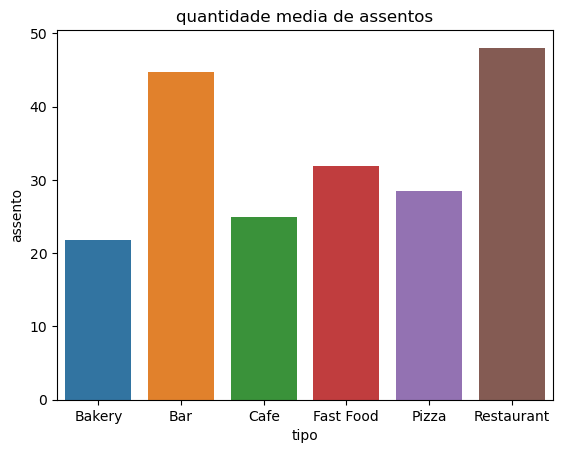

In [167]:
ax = sns.barplot(x='tipo', y='assento', data=tipomedia)

# Adicionando título ao gráfico
ax.set_title('quantidade media de assentos')

# Exibindo o gráfico
plt.show()

<font color = 'green'> restaurantes, bares e fastfoods têm mais assentos, enquanto padarias e cafés têm menos.  
    Por um lado é compreensivo, pois padarias e cafés, vendem muito para viagem, enquanto restaurantes e bares não.    
Além disso restaurantes e bares tendem a acomodar clientes por muito mais tempo. O que surpreende é o fato de pizzarias terem menos de 30 assentos em média. </font>

[sumario](#sumario)
## semparando os dados dos nomes das ruas da coluna address em uma coluna separada.
<a id='ruas'> </a>

para realizar a operação temos que procurar os numeros  e outras indicações, como apartamento, casa etc, para obter apenas o nome da rua para isso é necessário usar expressões regulares

In [168]:
import re

In [169]:
restaurantes['ruas'] = restaurantes['endereco'].apply(lambda dado: re.sub(r'^\d+|#.*|\bSTE\b.*|\bST\b.*', '', dado))



vejamos os dados como ficaram:

In [170]:
#verificando dados
print(restaurantes[['endereco','ruas']])

                         endereco                ruas
0          3708 N EAGLE ROCK BLVD   N EAGLE ROCK BLVD
1             100 WORLD WAY # 120          WORLD WAY 
2       6801 HOLLYWOOD BLVD # 253     HOLLYWOOD BLVD 
3              1814 W SUNSET BLVD       W SUNSET BLVD
4              2100 ECHO PARK AVE       ECHO PARK AVE
...                           ...                 ...
9646             217 W TEMPLE AVE        W TEMPLE AVE
9647             5750 MELROSE AVE         MELROSE AVE
9648          6741 HOLLYWOOD BLVD      HOLLYWOOD BLVD
9649      548 S SPRING ST STE 100           S SPRING 
9650  1300 S SAN PEDRO ST STE 111        S SAN PEDRO 

[9651 rows x 2 columns]


In [171]:
restaurantes['ruas'].nunique()

1158

[sumario](#sumario)
### gráfico das dez ruas com o maior número de restaurantes.
<a id='top10'> </a>

In [172]:
ruasr=restaurantes.groupby('ruas').agg({'id':'count'}).reset_index().sort_values(by='id', ascending=False)
top10=ruasr.head(10)
print(top10)
#alterando nome da coluna id para total
ruasr.columns=['ruas','total']
#acrescentando coluna para identificar o percentual de estabelecimento em cada rua
ruasr2=ruasr
ruasr2['percentual']=ruasr['total']*100/ruasr['total'].sum()
ruasr2['percentual'] = ruasr2['percentual'].round(2)
x=ruasr2.head(10)


                    ruas   id
1042       W SUNSET BLVD  296
1031         W PICO BLVD  288
710          S FIGUEROA   227
930               W 3RD   225
936               W 6TH   212
1096      WILSHIRE BLVD   207
350       HOLLYWOOD BLVD  167
1095       WILSHIRE BLVD  161
809        S VERMONT AVE  148
853    SANTA MONICA BLVD  146


In [173]:

print(x['percentual'].sum())

21.51


<font color = 'green'>21% dos estabelecimentos estão em 10 ruas

In [174]:
print(top10['ruas'].reset_index(drop=True))

0         W SUNSET BLVD
1           W PICO BLVD
2           S FIGUEROA 
3                W 3RD 
4                W 6TH 
5        WILSHIRE BLVD 
6        HOLLYWOOD BLVD
7         WILSHIRE BLVD
8         S VERMONT AVE
9     SANTA MONICA BLVD
Name: ruas, dtype: object


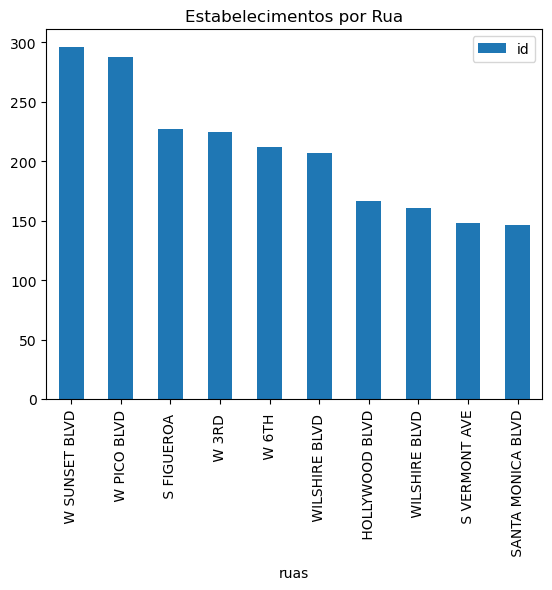

In [175]:
top10.plot(x='ruas',y='id',kind='bar')
plt.title('Estabelecimentos por Rua')

plt.show()

In [176]:
contagemruas=restaurantes.groupby('ruas').agg({'id':'count'})
contagemruas.describe()

,id
count,1158.000000
mean,8.334197
std,24.787004
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,296.000000


[sumario](#sumario)
### encontrando o número de ruas que têm apenas um restaurante.
<a id='so1'> </a>

In [177]:
dfrua=restaurantes.groupby('ruas').agg({'id':'count'}).reset_index()
dfrua.columns=['rua','restaurantes']
print("quantidade de ruas com apenas um restaurante:", dfrua[dfrua['restaurantes']==1]['restaurantes'].count())

quantidade de ruas com apenas um restaurante: 620


<font color = 'green'>temos algumas ruas com mais de 100 estabelecimetnos, as 2 maiores rua têm quase 300 estabelecimentos. As outras 8 têm mais de 100. Creio que sejam avenidas comerciais, provavelmente no centro comercial da cidade. A média de estabelecimentos por rua é 7,3. O que é muito pequeno, a maioria(620), inclusive, só tem um estabelecimento. 

[sumario](#sumario)
### Analise das ruas com muitos restaurantes, à luz da distribuição do número de assentos.
<a id='distribuicao'> </a>

vamos comparar todo o banco de dados com os dados das 10 ruas com mais estabelecimentos.

In [178]:
#filtrando os dados:
top10ruas=restaurantes[restaurantes['ruas'].isin(top10['ruas'])].reset_index().drop('index',axis=1)
top10ruas

,id,nome,endereco,rede,tipo,assento,ruas
0,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
1,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7,W 6TH
2,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38,W SUNSET BLVD
3,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133,W 6TH
4,11802,HMS BOUNTY,3357 WILSHIRE BLVD,False,Restaurant,147,WILSHIRE BLVD
...,...,...,...,...,...,...,...
2072,21397,LE BON GARCON,5158 HOLLYWOOD BLVD,False,Restaurant,21,HOLLYWOOD BLVD
2073,21399,SPREAD & LOVE,818 WILSHIRE BLVD,False,Restaurant,10,WILSHIRE BLVD
2074,21411,EAT THIS CAFE,6545 SANTA MONICA BLVD,False,Restaurant,41,SANTA MONICA BLVD
2075,21414,KIFF KAFE,12217 W PICO BLVD,False,Restaurant,29,W PICO BLVD


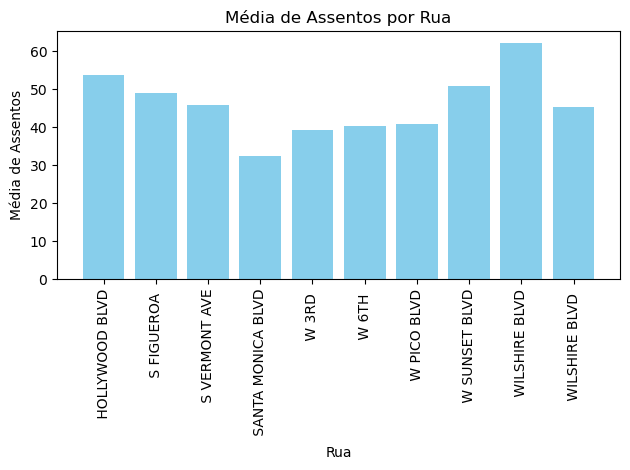

In [179]:
gruporuaassento=top10ruas.groupby('ruas').agg({'assento':'mean'}).reset_index()
# Criar o gráfico de barras
plt.bar(gruporuaassento['ruas'], gruporuaassento['assento'], color='skyblue')

# Adicionar título e rótulos dos eixos
plt.title('Média de Assentos por Rua')
plt.xlabel('Rua')
plt.ylabel('Média de Assentos')

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=90)

# Exibir o gráfico
plt.tight_layout()  # Ajusta o layout para evitar corte de informações
plt.show()


In [180]:
gruportipoassento=top10ruas.groupby('tipo').agg({'assento':'mean'}).reset_index()
assentotipo=restaurantes.groupby('tipo').agg({'assento':'mean'}).reset_index()


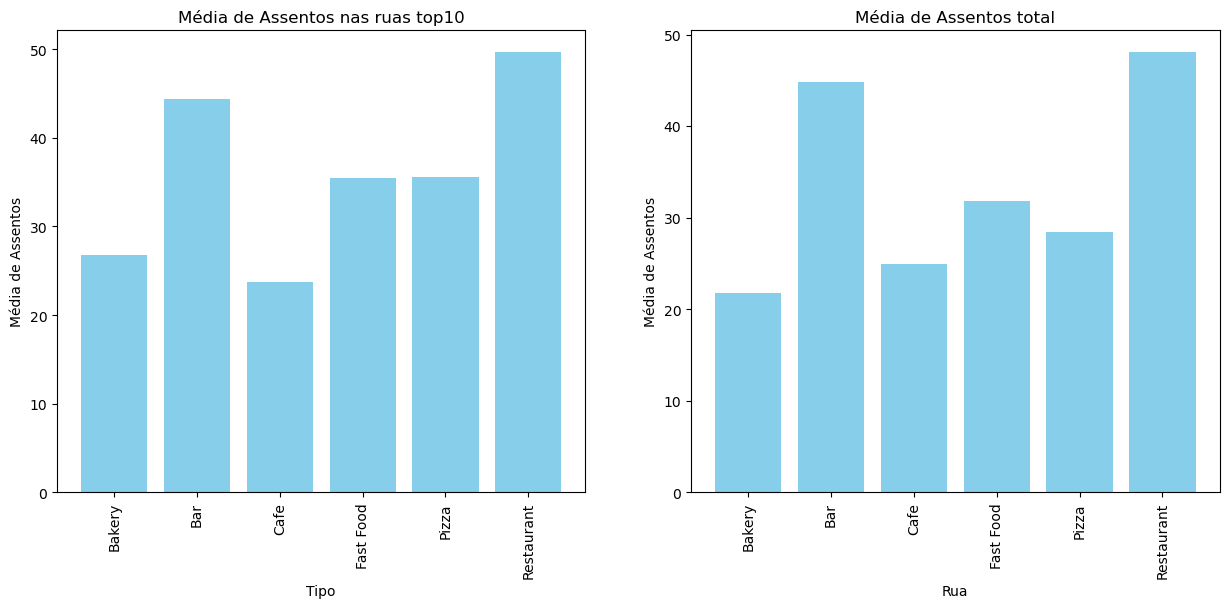

In [181]:
# Cria uma figura com duas subplots (uma linha, duas colunas)
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Primeiro gráfico
axs[0].bar(gruportipoassento['tipo'], gruportipoassento['assento'], color='skyblue')
axs[0].set_title('Média de Assentos nas ruas top10')
axs[0].set_xlabel('Tipo')
axs[0].set_ylabel('Média de Assentos')
axs[0].tick_params(axis='x', rotation=90)  # Rotaciona rótulos do eixo x para melhor visualização

# Segundo gráfico
axs[1].bar(assentotipo['tipo'], assentotipo['assento'], color='skyblue')
axs[1].set_title('Média de Assentos total')
axs[1].set_xlabel('Rua')
axs[1].set_ylabel('Média de Assentos')
axs[1].tick_params(axis='x', rotation=90)  # Rotaciona rótulos do eixo x para melhor visualização

# Exibe a figura com os subplots
plt.show()


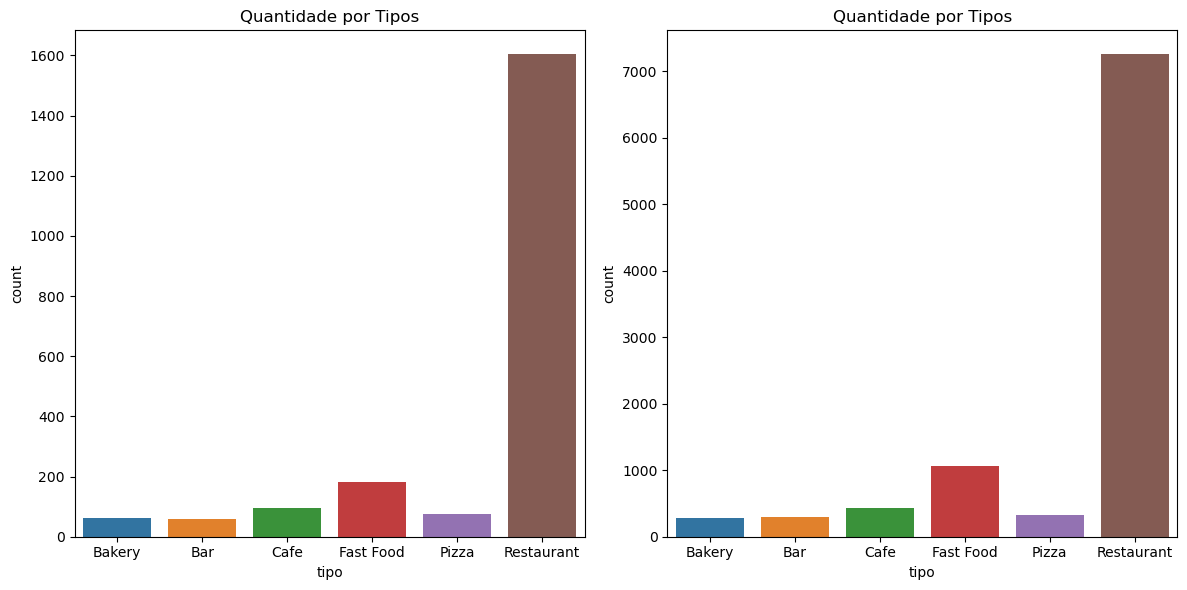

In [182]:

fig.clf()

# Cria uma figura com duas subplots (uma linha, duas colunas)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# Plot do primeiro gráfico
sns.countplot(data=top10ruas.sort_values(by='tipo'), x="tipo", ax=axs[0])
axs[0].set_title("Quantidade por Tipos")

# Plot do segundo gráfico
sns.countplot(data=restaurantes.sort_values(by='tipo'), x="tipo", ax=axs[1])
axs[1].set_title("Quantidade por Tipos")

# Ajusta o layout para evitar sobreposição de informações
plt.tight_layout()

# Exibe a figura com os subplots
plt.show()


In [183]:
toptipomedia=top10ruas.groupby('tipo')['assento'].mean().reset_index()
toptipomedia

,tipo,assento
0,Bakery,26.838710
1,Bar,44.400000
2,Cafe,23.721649
3,Fast Food,35.441989
4,Pizza,35.594595
5,Restaurant,49.627573


grefico de pontos

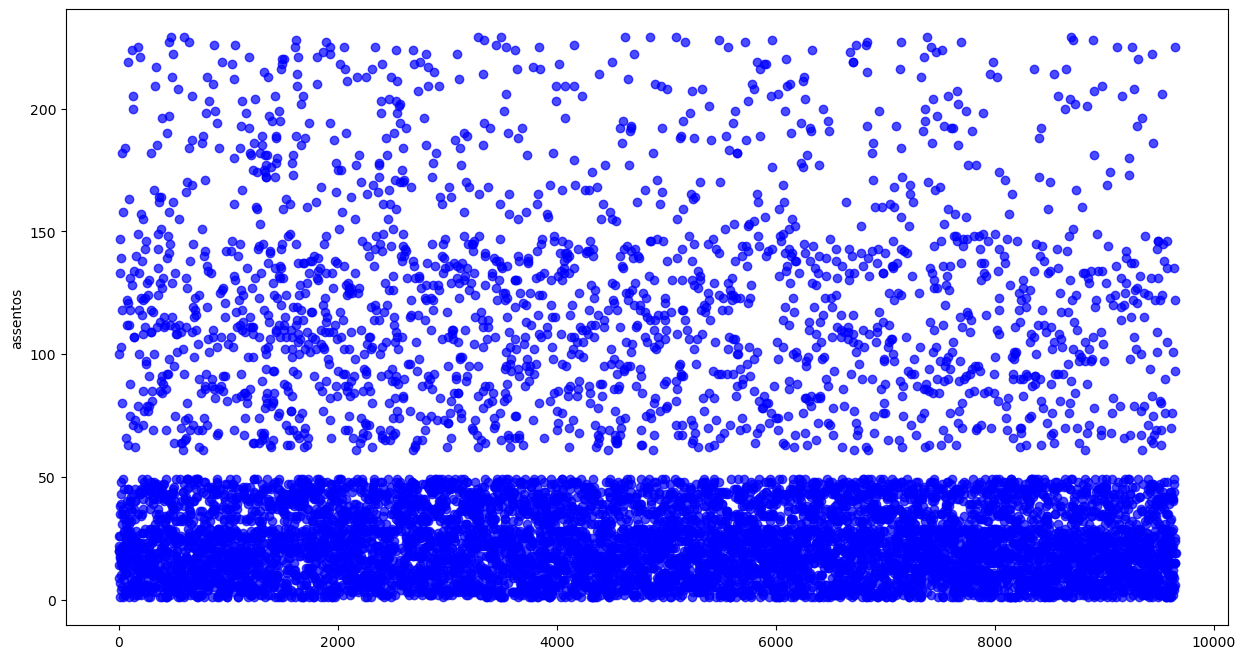

In [184]:
y = restaurantes['assento']
plt.figure(figsize=(15, 8))
plt.scatter(restaurantes.index, y, color='blue', alpha=0.7)
plt.ylabel('assentos')
plt.show()

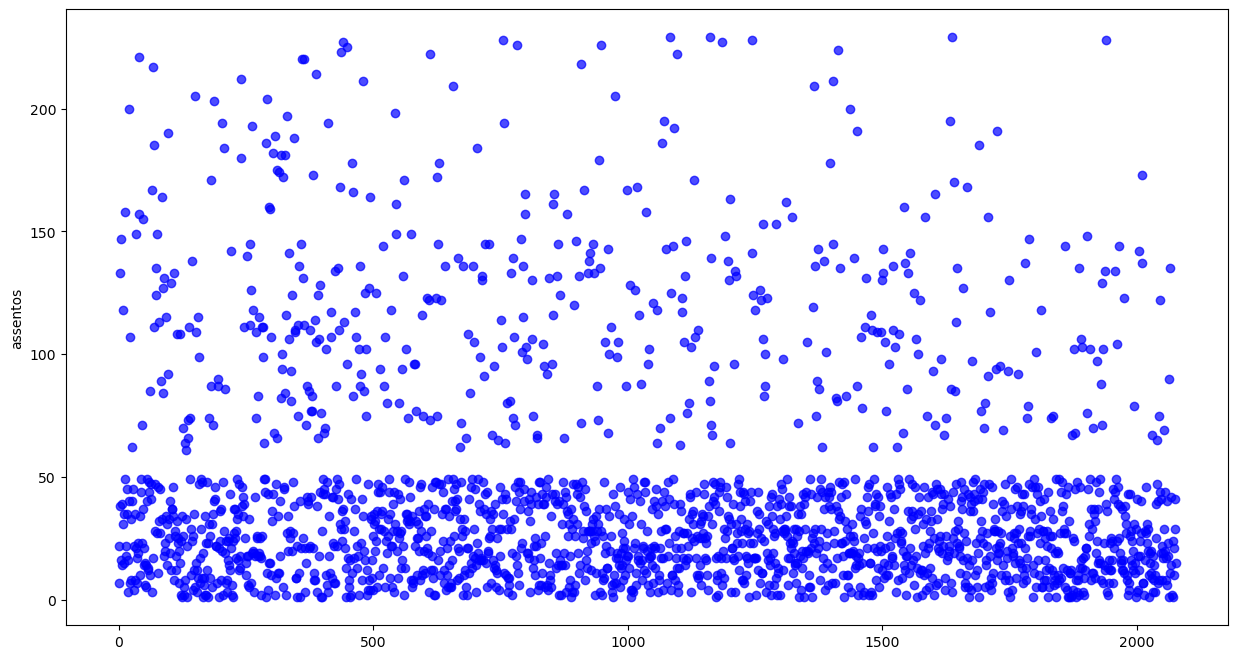

In [185]:
'''sns.stripplot(x= 'endereco' ,y= 'assento', data=top10ruas)'''
y = top10ruas['assento']
plt.figure(figsize=(15, 8))
plt.scatter(top10ruas.index, y, color='blue', alpha=0.7)
plt.ylabel('assentos')
plt.show()



histograma

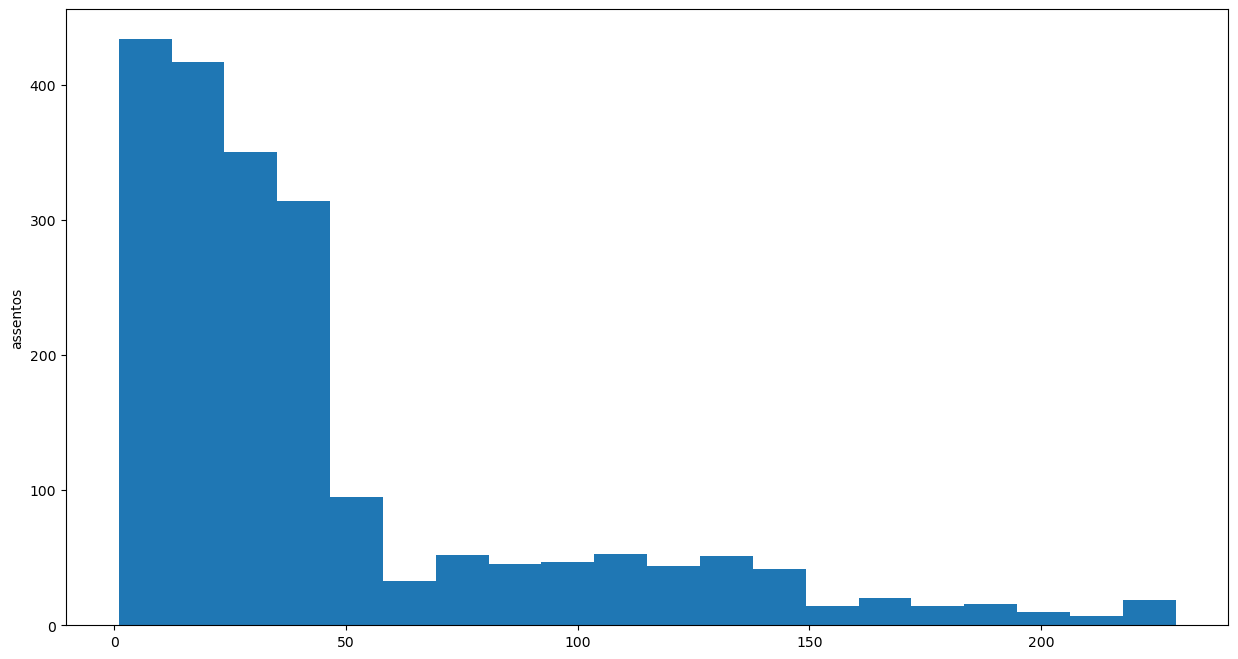

In [186]:
plt.figure(figsize=(15, 8))
plt.hist(top10ruas['assento'], bins=20)
plt.ylabel('assentos')
plt.show()

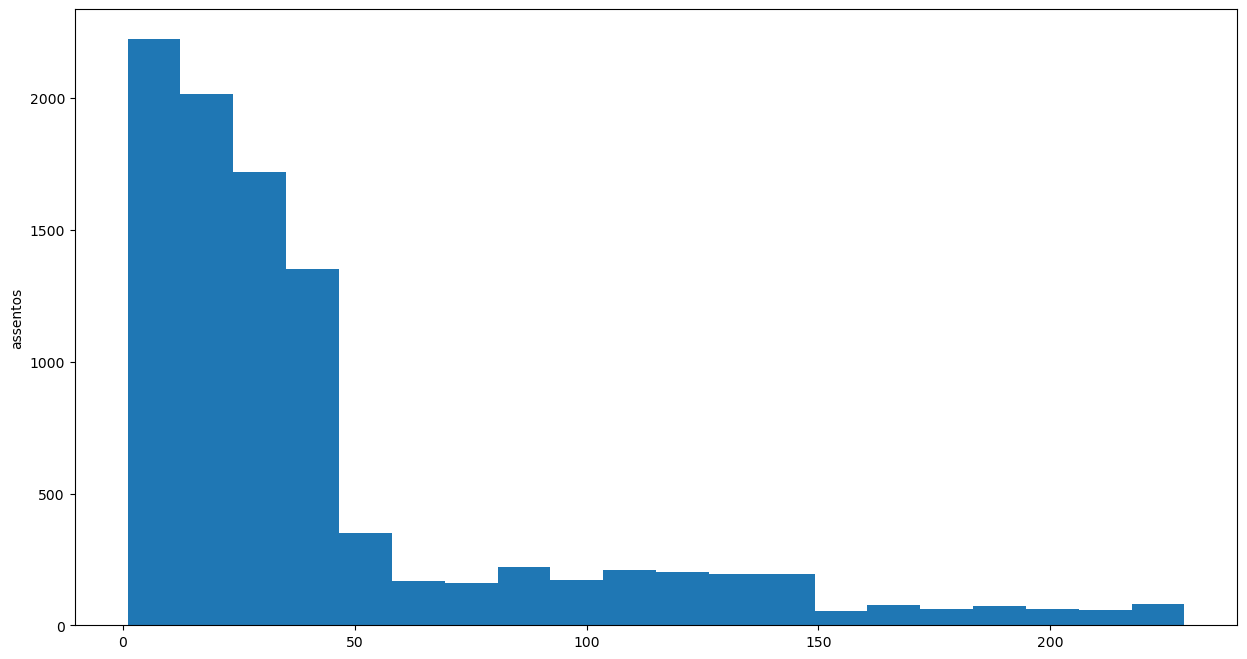

In [187]:
plt.figure(figsize=(15, 8))
plt.hist(restaurantes['assento'], bins=20)
plt.ylabel('assentos')
plt.show()

In [188]:
restaurantes['assento'].describe()

count    9651.000000
mean       43.695161
std        47.622874
min         1.000000
25%        14.000000
50%        27.000000
75%        46.000000
max       229.000000
Name: assento, dtype: float64

In [189]:
print(np.percentile(top10ruas['assento'], 95),
top10ruas['assento'].quantile(0.99))

148.19999999999982 212.47999999999956


In [190]:
print(np.percentile(restaurantes['assento'], 95),
restaurantes['assento'].quantile(0.99))

148.0 214.0


In [191]:
top10ruasfil=top10ruas[top10ruas['assento']<=145]
restaurantesfil=restaurantes[restaurantes['assento']<=145]

grafico de 'violino'

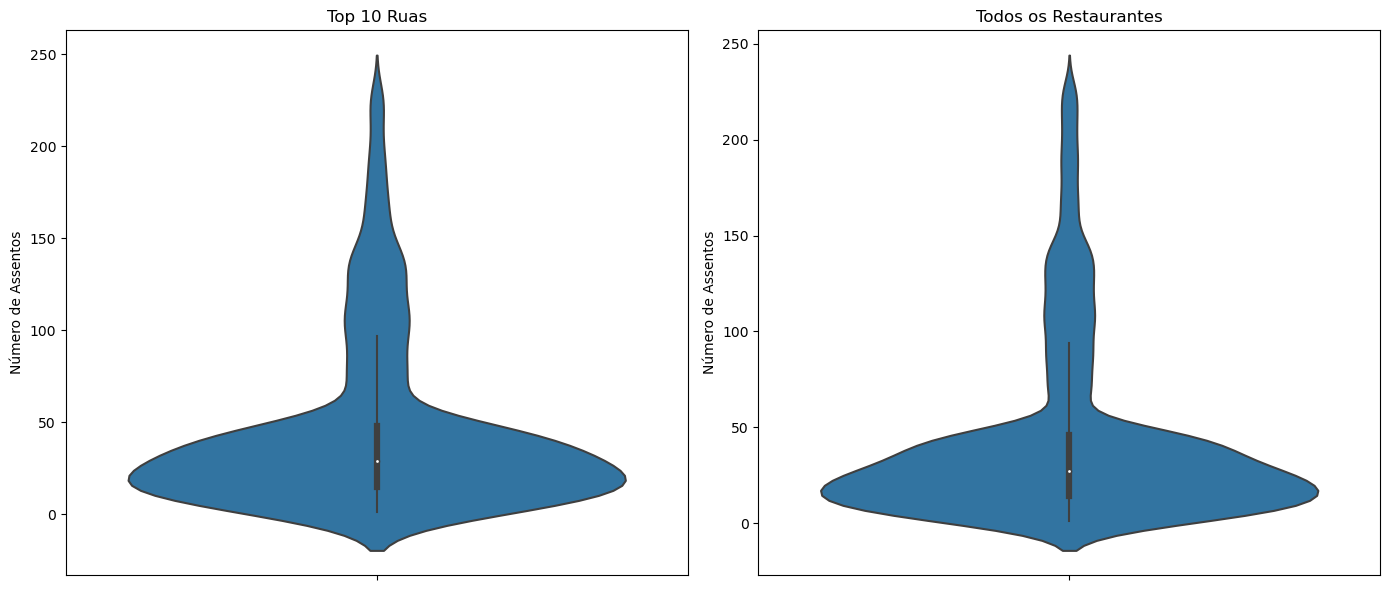

In [192]:


fig, graf = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plotar violinplot para top10ruas
sns.violinplot(y='assento', data=top10ruas, ax=graf[0])
graf[0].set_title('Top 10 Ruas')
graf[0].set_ylabel('Número de Assentos')
graf[0].set_xlabel('')

# Plotar violinplot para restaurantes
sns.violinplot(y='assento', data=restaurantes, ax=graf[1])
graf[1].set_title('Todos os Restaurantes')
graf[1].set_ylabel('Número de Assentos')
graf[1].set_xlabel('')

# Ajustar layout
plt.tight_layout()

# Mostrar os subplots
plt.show()

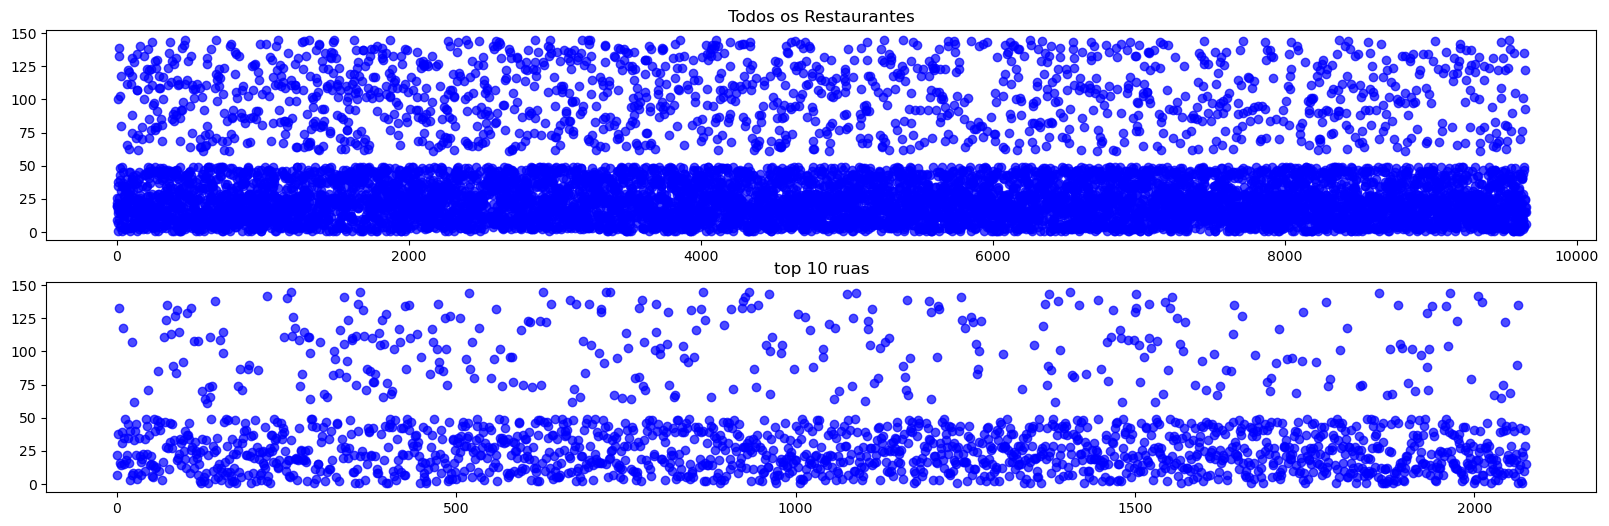

In [193]:
fig, pontos = plt.subplots(nrows=2, ncols=1, figsize=(20, 6))
y = restaurantesfil['assento']
pontos[0].scatter(restaurantesfil.index, y, color='blue', alpha=0.7,)
pontos[0].set_title('Todos os Restaurantes')


y2 = top10ruasfil['assento']
pontos[1].scatter(top10ruasfil.index, y2, color='blue', alpha=0.7)
pontos[1].set_title('top 10 ruas')
plt.show()

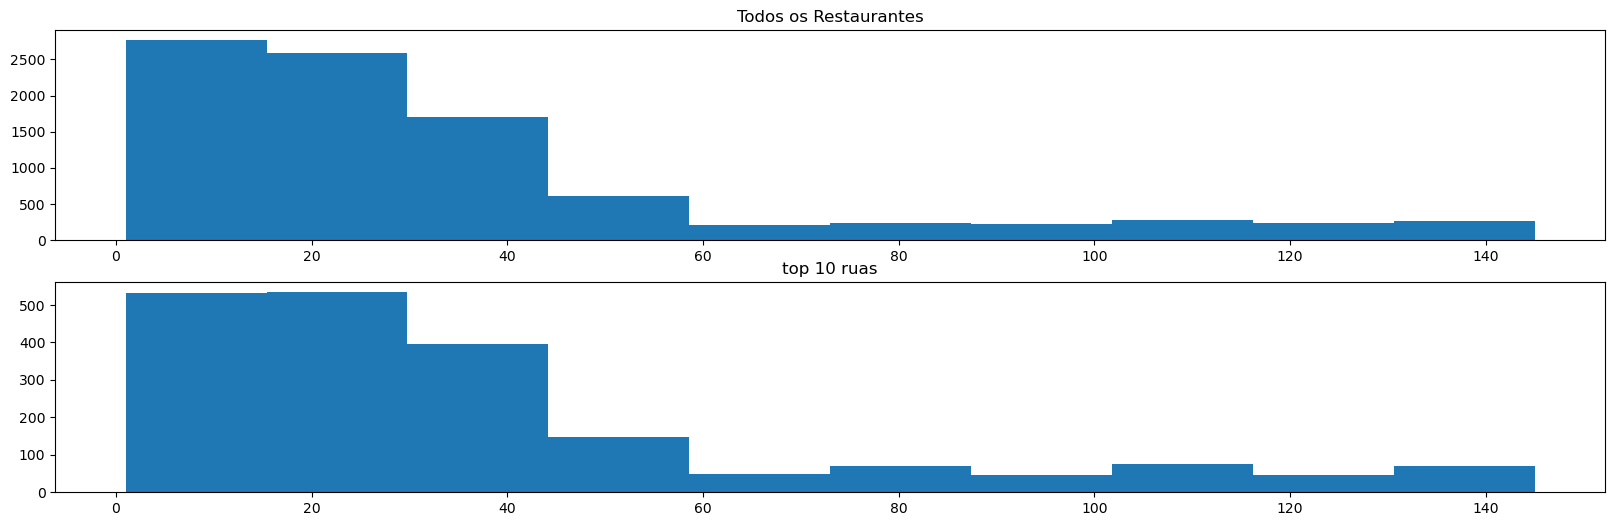

In [194]:
fig, pontos = plt.subplots(nrows=2, ncols=1, figsize=(20, 6))
y = restaurantesfil['assento']
pontos[0].hist( y)
pontos[0].set_title('Todos os Restaurantes')


y2 = top10ruasfil['assento']
pontos[1].hist( y2)
pontos[1].set_title('top 10 ruas')
plt.show()

In [195]:
top10ruasfil=top10ruas[top10ruas['assento']<=60]
restaurantesfil=restaurantes[restaurantes['assento']<=60]

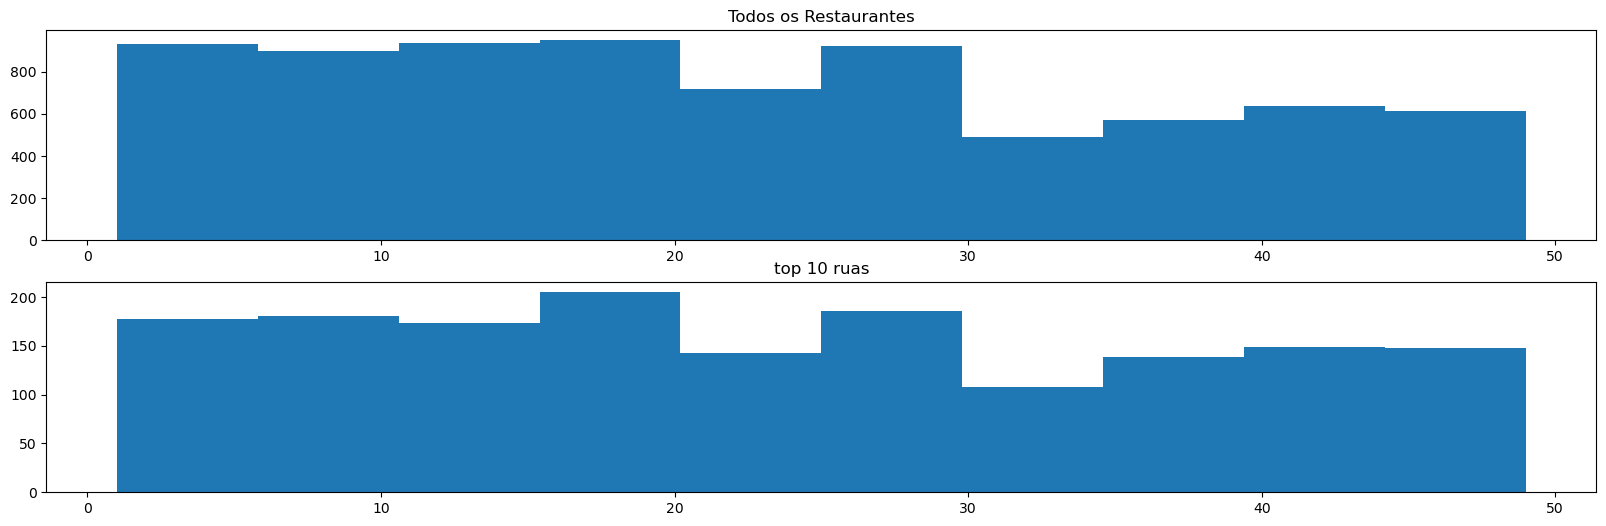

In [196]:
fig, pontos = plt.subplots(nrows=2, ncols=1, figsize=(20, 6))
y = restaurantesfil['assento']
pontos[0].hist( y)
pontos[0].set_title('Todos os Restaurantes')


y2 = top10ruasfil['assento']
pontos[1].hist( y2)
pontos[1].set_title('top 10 ruas')
plt.show()

[sumario](#sumario)
### conclusões sobre tendencias
<a id='conclusao'> </a>

<font color = 'blue'>a tendencia de assentos geral e das ruas mais movimentadas é a mesma, com muito pouca variação, a qual tende a apresentar levemente mais acentos nas top10 ruas movimentadas.

[sumario](#sumario)
# Apresentacao 
<a id='apresentacao'> </a>

Link da apresentação: 
https://drive.google.com/file/d/1nr1m781EEO0GY1AWbel3U2Vi6nJ_vXvp/view?usp=drive_link